In [1]:
import os
import pandas as pd
import numpy as np
import glob 
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
from PIL import Image
from IPython import display 

import sklearn.preprocessing
from sklearn.externals import joblib
from sklearn.metrics import log_loss

In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k
from keras.metrics import top_k_categorical_accuracy
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.models import Sequential, Model, load_model
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
label_binarizer = joblib.load('CNN/Label_binarizer.pkl')

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def top2(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

def top3(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top4(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=4)

def top5(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)

# Extraction des features

Pour chaque image et chaque modèles de Keras, les features ont été extraite dans un fichier externe pour des raisons de performances. Il faut se référer au fichier prepare_matrices.py présent dans le dossier CNN.

# Evaluation des extractions

On a maintenant l'ensemble des features pour chaque modèle. On va donc maintenant comparer à classifieur identique les différent extracteurs. Le classifieur ne sera peut-etre pas optimal mais l'objectif est de trouver celui avec les features les plus pertinentes.

In [4]:
batch_size = 64
optimiser = "Adam"
metrics = ["accuracy", top2, top3, top4, top5]
epoch_max = 100
split_cv = 0.1
verbose = 1
patience = 2
results = {}

## InceptionResNetV2

In [5]:
data = np.load('CNN/datas/preprocessed_train_InceptionResNetV2.npz')
X = data["X"]
y = data["y"]
y = label_binarizer.transform(y)

In [23]:
X.shape

(10222, 2048)

In [6]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=patience, verbose=0, mode='auto')

In [7]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["InceptionResNetV2"] = history.history

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 2s 179us/step - loss: 0.8320 - acc: 0.8139 - top2: 0.8929 - top3: 0.9193 - top4: 0.9317 - top5: 0.9378 - val_loss: 0.4381 - val_acc: 0.8983 - val_top2: 0.9619 - val_top3: 0.9736 - val_top4: 0.9785 - val_top5: 0.9795
Epoch 2/100
9199/9199 [==============================] - 1s 96us/step - loss: 0.5300 - acc: 0.8741 - top2: 0.9510 - top3: 0.9724 - top4: 0.9818 - top5: 0.9860 - val_loss: 0.4262 - val_acc: 0.9013 - val_top2: 0.9629 - val_top3: 0.9785 - val_top4: 0.9824 - val_top5: 0.9863
Epoch 3/100
9199/9199 [==============================] - 1s 98us/step - loss: 0.4984 - acc: 0.8831 - top2: 0.9574 - top3: 0.9774 - top4: 0.9834 - top5: 0.9885 - val_loss: 0.5439 - val_acc: 0.8847 - val_top2: 0.9560 - val_top3: 0.9775 - val_top4: 0.9834 - val_top5: 0.9863
Epoch 4/100
9199/9199 [==============================] - 1s 95us/step - loss: 0.5088 - acc: 0.8866 - top2: 0.9618 - top3: 0.9797 - top4

## InceptionV3

In [22]:
data = np.load('CNN/datas/preprocessed_train_InceptionV3.npz')
X = data["X"]
y = data["y"]
y = label_binarizer.transform(y)

In [9]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=patience, verbose=0, mode='auto')

In [10]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["InceptionV3"] = history.history

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 1s 134us/step - loss: 1.1190 - acc: 0.7262 - top2: 0.8381 - top3: 0.8773 - top4: 0.8955 - top5: 0.9066 - val_loss: 0.5213 - val_acc: 0.8514 - val_top2: 0.9462 - val_top3: 0.9736 - val_top4: 0.9824 - val_top5: 0.9863
Epoch 2/100
9199/9199 [==============================] - 1s 108us/step - loss: 0.6734 - acc: 0.8291 - top2: 0.9309 - top3: 0.9613 - top4: 0.9723 - top5: 0.9795 - val_loss: 0.5892 - val_acc: 0.8631 - val_top2: 0.9413 - val_top3: 0.9599 - val_top4: 0.9717 - val_top5: 0.9765
Epoch 3/100
9199/9199 [==============================] - 1s 104us/step - loss: 0.6745 - acc: 0.8444 - top2: 0.9416 - top3: 0.9674 - top4: 0.9781 - top5: 0.9834 - val_loss: 0.5930 - val_acc: 0.8573 - val_top2: 0.9560 - val_top3: 0.9765 - val_top4: 0.9853 - val_top5: 0.9853


## VGG16

In [9]:
data = np.load('CNN/datas/preprocessed_train_VGG16.npz')
X = data["X"]
y = data["y"]
y = label_binarizer.transform(y)

In [12]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=patience, verbose=0, mode='auto')

In [13]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["VGG16"] = history.history

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 1s 132us/step - loss: 14.7757 - acc: 0.0733 - top2: 0.1185 - top3: 0.1632 - top4: 0.2036 - top5: 0.2395 - val_loss: 14.6555 - val_acc: 0.0860 - val_top2: 0.1466 - val_top3: 0.2385 - val_top4: 0.3363 - val_top5: 0.3998
Epoch 2/100
9199/9199 [==============================] - 1s 96us/step - loss: 14.6758 - acc: 0.0850 - top2: 0.2320 - top3: 0.3623 - top4: 0.4798 - top5: 0.5708 - val_loss: 14.7050 - val_acc: 0.0850 - val_top2: 0.2796 - val_top3: 0.4457 - val_top4: 0.5806 - val_top5: 0.6999
Epoch 3/100
9199/9199 [==============================] - 1s 95us/step - loss: 14.5959 - acc: 0.0912 - top2: 0.3361 - top3: 0.5401 - top4: 0.6780 - top5: 0.7780 - val_loss: 14.6819 - val_acc: 0.0870 - val_top2: 0.4164 - val_top3: 0.6510 - val_top4: 0.7928 - val_top5: 0.8925


## Xception

In [18]:
data = np.load('CNN/datas/preprocessed_train_Xception.npz')
X = data["X"]
y = data["y"]
y = label_binarizer.transform(y)

In [15]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=patience, verbose=0, mode='auto')

In [16]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["Xception"] = history.history

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 1s 137us/step - loss: 0.9757 - acc: 0.7625 - top2: 0.8675 - top3: 0.9003 - top4: 0.9174 - top5: 0.9268 - val_loss: 0.4145 - val_acc: 0.8710 - val_top2: 0.9589 - val_top3: 0.9785 - val_top4: 0.9834 - val_top5: 0.9853
Epoch 2/100
9199/9199 [==============================] - 1s 106us/step - loss: 0.4759 - acc: 0.8603 - top2: 0.9542 - top3: 0.9753 - top4: 0.9834 - top5: 0.9879 - val_loss: 0.4949 - val_acc: 0.8563 - val_top2: 0.9550 - val_top3: 0.9736 - val_top4: 0.9824 - val_top5: 0.9883
Epoch 3/100
9199/9199 [==============================] - 1s 102us/step - loss: 0.4209 - acc: 0.8753 - top2: 0.9611 - top3: 0.9812 - top4: 0.9892 - top5: 0.9933 - val_loss: 0.4641 - val_acc: 0.8739 - val_top2: 0.9501 - val_top3: 0.9736 - val_top4: 0.9853 - val_top5: 0.9873


## ResNet50

In [20]:
data = np.load('CNN/datas/preprocessed_train_ResNet50.npz')
X = data["X"]
y = data["y"]
y = label_binarizer.transform(y)

In [18]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=patience, verbose=0, mode='auto')

In [19]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["ResNet50"] = history.history

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 1s 148us/step - loss: 2.2360 - acc: 0.4972 - top2: 0.6477 - top3: 0.7191 - top4: 0.7616 - top5: 0.7903 - val_loss: 1.1721 - val_acc: 0.7126 - val_top2: 0.8475 - val_top3: 0.9022 - val_top4: 0.9306 - val_top5: 0.9443
Epoch 2/100
9199/9199 [==============================] - 1s 106us/step - loss: 1.3609 - acc: 0.6768 - top2: 0.8256 - top3: 0.8890 - top4: 0.9158 - top5: 0.9341 - val_loss: 1.4191 - val_acc: 0.7116 - val_top2: 0.8377 - val_top3: 0.8993 - val_top4: 0.9306 - val_top5: 0.9511
Epoch 3/100
9199/9199 [==============================] - 1s 102us/step - loss: 1.2268 - acc: 0.7198 - top2: 0.8673 - top3: 0.9167 - top4: 0.9417 - top5: 0.9562 - val_loss: 1.3952 - val_acc: 0.7380 - val_top2: 0.8602 - val_top3: 0.9032 - val_top4: 0.9335 - val_top5: 0.9404


## MobileNet

In [16]:
data = np.load('CNN/datas/preprocessed_train_MobileNet.npz')
X = data["X"]
y = data["y"]
y = label_binarizer.transform(y)

In [21]:
model = Sequential()

model.add(Dense(512, input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=patience, verbose=0, mode='auto')

In [22]:
model.compile(loss = "categorical_crossentropy", optimizer = optimiser, metrics=metrics)
history = model.fit(  X, y, 
                      epochs=epoch_max, 
                      batch_size=batch_size, 
                      callbacks=[early_stop], 
                      verbose=verbose, 
                      shuffle=True, 
                      validation_split=split_cv
                     )

results["MobileNet"] = history.history

Train on 9199 samples, validate on 1023 samples
Epoch 1/100
9199/9199 [==============================] - 1s 150us/step - loss: 2.4324 - acc: 0.4231 - top2: 0.5740 - top3: 0.6478 - top4: 0.6955 - top5: 0.7294 - val_loss: 1.1752 - val_acc: 0.6540 - val_top2: 0.8192 - val_top3: 0.8807 - val_top4: 0.9062 - val_top5: 0.9257
Epoch 2/100
9199/9199 [==============================] - 1s 100us/step - loss: 1.2490 - acc: 0.6643 - top2: 0.8122 - top3: 0.8776 - top4: 0.9090 - top5: 0.9327 - val_loss: 1.2101 - val_acc: 0.6774 - val_top2: 0.8104 - val_top3: 0.8719 - val_top4: 0.9130 - val_top5: 0.9365
Epoch 3/100
9199/9199 [==============================] - 1s 99us/step - loss: 1.0618 - acc: 0.7114 - top2: 0.8502 - top3: 0.9086 - top4: 0.9387 - top5: 0.9566 - val_loss: 1.1408 - val_acc: 0.7077 - val_top2: 0.8319 - val_top3: 0.9062 - val_top4: 0.9306 - val_top5: 0.9492
Epoch 4/100
9199/9199 [==============================] - 1s 101us/step - loss: 0.9351 - acc: 0.7471 - top2: 0.8836 - top3: 0.9312 - to

In [23]:
save_obj(results, "perf_extractor")

## Selection Extracteur

Ayant récupéré le top 1à5 pour chauqe modèles, on va regarder leur résultats

In [24]:
results = load_obj("perf_extractor")

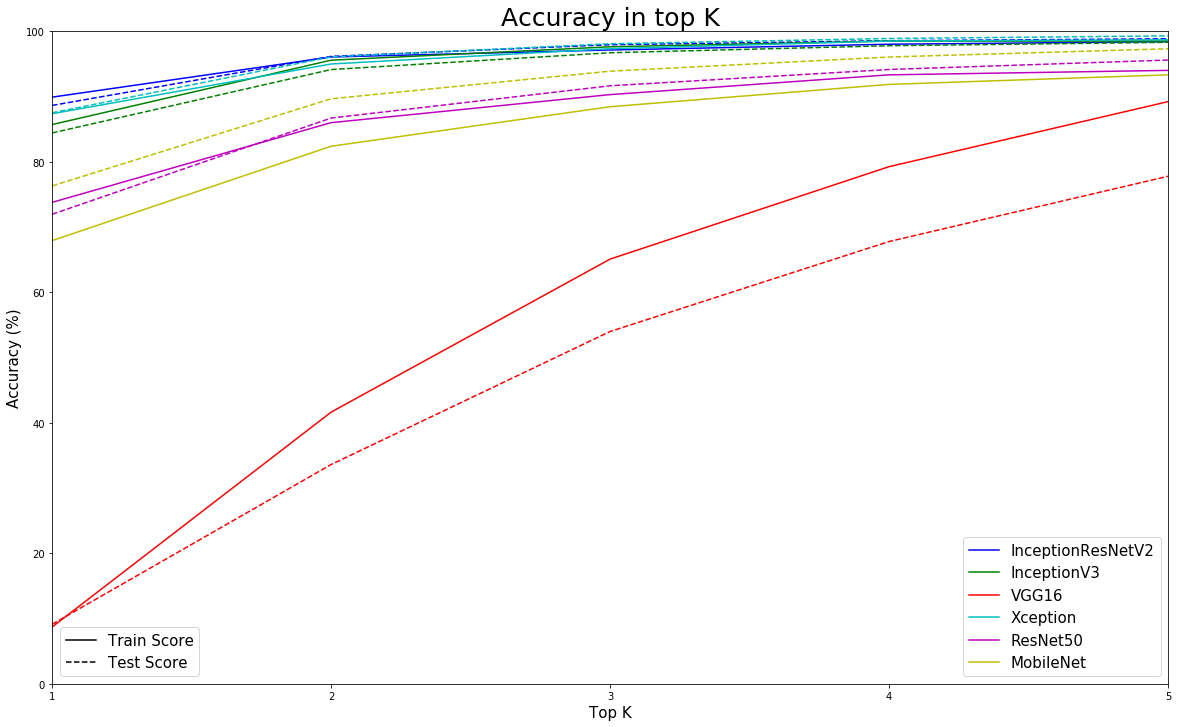

In [37]:
color = ["b", "g", "r", "c", "m", "y"]
plt.figure(figsize=(20,12))
for model, history in results.items():
    c = color.pop(0)
    plt.plot([1, 2, 3, 4, 5], [100*history["val_acc"][-1], 
                               100*history["val_top2"][-1],  
                               100*history["val_top3"][-1],
                               100*history["val_top4"][-1],
                               100*history["val_top5"][-1]
                              ], label=model, c=c)
    plt.plot([1, 2, 3, 4, 5], [100*history["acc"][-1], 
                               100*history["top2"][-1],  
                               100*history["top3"][-1],
                               100*history["top4"][-1],
                               100*history["top5"][-1]
                              ], linestyle='dashed', c=c)
    
train_line = mlines.Line2D([], [], color='k', label='Train Score')
test_line = mlines.Line2D([], [], color='k', linestyle='dashed', label='Test Score')

first_legend = plt.legend(loc=4, fontsize=15)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[train_line, test_line], loc=3, fontsize=15)
plt.title("Accuracy in top K", fontsize=25)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.xlabel("Top K", fontsize=15)
plt.xticks([1, 2, 3, 4, 5])
plt.ylim(0, 100)
plt.xlim(1, 5)
plt.savefig("img/top_k.png")
plt.show()

# Fine Tuning Classifieur

Malgré des résultats proches entre Xception, INceptionV3, InceptionResNetV2, le résultat sur le top 1 (qui est la précision la plus importante) est meilleur avec InceptionResNetV2 (+4% en test). On va donc tester plusieurs classifieurs en regardant leur précision mais aussi leur loss (important pour Kaggle)

In [6]:
data = np.load('CNN/datas/preprocessed_train_InceptionResNetV2.npz')
X = data["X"]
y = data["y"]
y_bin = label_binarizer.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, y_train_bin, y_test_bin  = train_test_split(X, y, y_bin, test_size = 0.2, random_state=42)

## multinomial logistic regression (OVR-OVO Logisitc Regression)

In [79]:
from sklearn.linear_model import SGDClassifier

# clf = SGDClassifier(loss="log")
# clf.fit(X_train, y_train)

print("training score : %.3f" % (clf.score(X_train, y_train)))
print("test score : \t %.3f" % (clf.score(X_test, y_test)))
y_pred_train = clf.predict_proba(X_train)
print("train Loss :\t %.3f" % (log_loss(y_train, y_pred_train)))
y_pred_test = clf.predict_proba(X_test)
print("test Loss :\t %.3f" % (log_loss(y_test, y_pred_test)))

training score : 0.942
test score : 	 0.903
train Loss :	 0.479
test Loss :	 1.326


In [8]:
pred = clf.predict_proba(X_test[:10])

## GradientBoostingClassifier

In [5]:
# Non gérable

# from sklearn.ensemble import GradientBoostingClassifier

# clf = GradientBoostingClassifier()
# clf.fit(X_train, y_train)

# # print the training scores
# print("training score : %.3f" % (clf.score(X_test, y_test), multi_class))

## SVC

In [9]:
# from sklearn.svm import SVC

# clf = SVC(probability=True)
# clf.fit(X_train, y_train)

# joblib.dump(clf, "CNN/models/SVC")

['CNN/models/SVC']

In [10]:
clf = joblib.load("CNN/models/SVC")

print("training score : %.3f" % (clf.score(X_train, y_train)))
print("test score : %.3f" % (clf.score(X_test, y_test)))
y_pred_train = clf.predict_proba(X_train)
print("train Loss :\t %.3f" % (log_loss(y_train, y_pred_train)))
y_pred_test = clf.predict_proba(X_test)
print("test Loss :\t %.3f" % (log_loss(y_test, y_pred_test)))

training score : 0.916
test score : 0.915
train Loss :	 0.841
test Loss :	 0.880


In [13]:
clf.predict_proba([X_train[0]])

array([[ 0.00169964,  0.00291029,  0.00251141,  0.00300528,  0.00422419,
         0.01149154,  0.00598289,  0.00924926,  0.01121036,  0.00876872,
         0.00185781,  0.00397313,  0.00171258,  0.01516086,  0.0021047 ,
         0.00397569,  0.00398585,  0.00166211,  0.00312268,  0.00198424,
         0.00279087,  0.00423287,  0.0023621 ,  0.00198917,  0.03929382,
         0.00158427,  0.0030145 ,  0.00805918,  0.00331389,  0.00296081,
         0.00330109,  0.00509328,  0.01260331,  0.01255154,  0.00169471,
         0.00179051,  0.0129341 ,  0.00589036,  0.00227904,  0.00590184,
         0.01419696,  0.01383556,  0.00564608,  0.00380818,  0.00405004,
         0.00211809,  0.00242271,  0.00507858,  0.00186239,  0.00700799,
         0.00329814,  0.0022378 ,  0.00305551,  0.00645839,  0.0025439 ,
         0.00471139,  0.01571467,  0.00621474,  0.00174559,  0.00429102,
         0.00332782,  0.00310752,  0.00252168,  0.00462109,  0.00188055,
         0.00212   ,  0.00228529,  0.00291322,  0.0

## ExtraTreesClassifier

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

for i in range(5, 15):
    print("Depth :", i)
    clf = ExtraTreesClassifier(max_depth=i)
    clf.fit(X_train, y_train)

    print("training score :\t %.3f" % (clf.score(X_train, y_train)))
    print("test score : \t\t %.3f" % (clf.score(X_test, y_test)))

Depth : 5
training score :	 0.661
test score : 		 0.637
Depth : 6
training score :	 0.782
test score : 		 0.756
Depth : 7
training score :	 0.820
test score : 		 0.773
Depth : 8
training score :	 0.879
test score : 		 0.822
Depth : 9
training score :	 0.896
test score : 		 0.822
Depth : 10
training score :	 0.943
test score : 		 0.845
Depth : 11
training score :	 0.955
test score : 		 0.854
Depth : 12
training score :	 0.964
test score : 		 0.869
Depth : 13
training score :	 0.980
test score : 		 0.873
Depth : 14
training score :	 0.992
test score : 		 0.883


In [20]:
from sklearn.ensemble import RandomForestClassifier

for i in range(5, 15):
    print("Depth :", i)
    clf = RandomForestClassifier(max_depth=i)
    clf.fit(X_train, y_train)

    print("training score :\t %.3f" % (clf.score(X_train, y_train)))
    print("test score : \t\t %.3f" % (clf.score(X_test, y_test)))

Depth : 5
training score :	 0.475
test score : 		 0.440
Depth : 6
training score :	 0.614
test score : 		 0.565
Depth : 7
training score :	 0.644
test score : 		 0.585
Depth : 8
training score :	 0.726
test score : 		 0.671
Depth : 9
training score :	 0.802
test score : 		 0.737
Depth : 10
training score :	 0.811
test score : 		 0.728
Depth : 11
training score :	 0.825
test score : 		 0.750
Depth : 12
training score :	 0.914
test score : 		 0.832
Depth : 13
training score :	 0.890
test score : 		 0.801
Depth : 14
training score :	 0.907
test score : 		 0.800


## NN

In [7]:
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

def swish(x):
    return x*K.sigmoid(x)

get_custom_objects().update({'custom_activation': swish})

In [8]:
batch_size = 64
optimiser = "Adadelta"
metrics = ["accuracy", top3, top5]
epoch_max = 100
split_cv = 0.1
verbose = 1

model = Sequential()
model.add(Dense(200, input_dim=X.shape[1], activation="custom_activation"))
model.add(Dropout(0.5))
# model.add(Dense(160, activation="custom_activation"))  #, activation="relu"
# model.add(Dropout(0.2))
model.add(Dense(120, activation='softmax'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [9]:
model.compile(loss = "categorical_crossentropy", optimizer=optimiser, metrics=metrics)
model.fit(X_train, y_train_bin, 
          epochs=epoch_max, 
          batch_size=batch_size, 
          callbacks=[early_stop], 
          verbose=verbose, 
          shuffle=True, 
          validation_split=split_cv
         )
# model.evaluate(X_test, y_test_bin)

Train on 7359 samples, validate on 818 samples
Epoch 1/100
7359/7359 [==============================] - 3s 343us/step - loss: 2.7465 - acc: 0.5342 - top3: 0.6845 - top5: 0.7315 - val_loss: 0.7261 - val_acc: 0.8961 - val_top3: 0.9768 - val_top5: 0.9878
Epoch 2/100
7359/7359 [==============================] - 1s 96us/step - loss: 0.7396 - acc: 0.8580 - top3: 0.9584 - top5: 0.9747 - val_loss: 0.3659 - val_acc: 0.9083 - val_top3: 0.9853 - val_top5: 0.9914
Epoch 3/100
7359/7359 [==============================] - 1s 89us/step - loss: 0.4995 - acc: 0.8782 - top3: 0.9747 - top5: 0.9859 - val_loss: 0.3120 - val_acc: 0.9132 - val_top3: 0.9841 - val_top5: 0.9927
Epoch 4/100
7359/7359 [==============================] - 1s 92us/step - loss: 0.4205 - acc: 0.8950 - top3: 0.9780 - top5: 0.9882 - val_loss: 0.3008 - val_acc: 0.9071 - val_top3: 0.9853 - val_top5: 0.9927
Epoch 5/100
7359/7359 [==============================] - 1s 91us/step - loss: 0.3778 - acc: 0.9005 - top3: 0.9830 - top5: 0.9905 - val_l

In [10]:
from keras.models import load_model

model.save('CNN/models/final_classifier.h5')

# Conclusion

En terme de précision, le SVC est très bon. Le problème c'est que le loss reste important. Il faut donc mieux partir sur le NN. Ayant testé plein d'architecture, vous trouverez les résultats ci dessous :
<ul>
<li>512+relu - D05 - 256+relu - 120 - Soft         => 91.08% (loss: 0.3176, val_loss: 0.3136)</li>
<li>350 - D05 - 250 - D02 - 120 - Soft             => 91.32% (loss: 0.3191, val_loss: 0.2942)</li>
<li>200+elu - D03 - 120 - Soft                     => 90.83% (loss: 0.2452, val_loss: 0.2845) => leger overfitting</li>
<li>250+elu - D02 - 120 - Soft                     => 90.71% (loss: 0.2698, val_loss: 0.2923) => leger overfitting</li>
<li>200+swish - D02 - 120 - Soft                   => 91.69% (loss: 0.2776, val_loss: 0.2824)</li>
<li>200+relu - D02 - 120 - Soft                    => 91.20% (loss: 0.2422, val_loss: 0.2892) => leger overfitting</li>
<li>200+swish - D02 - 160+swish + D02 - 120 - Soft => 91.08% (loss: 0.2842, val_loss: 0.2937)</li>
</ul>

La fonction swish est une toute nouvelle fonction d'activation sortie cette été (https://twitter.com/aureliengeron/status/920921225379147777)

# Pour Kaggle

Avant de finir, on va profité de toute cette préparation pour faire la compétition Kaggle

In [49]:
data = np.load('CNN/datas/preprocessed_test_InceptionResNetV2.npz')
X = data["X"]
img_id = data["y"]

In [50]:
# model = load_model('final_classifier.h5', custom_objects={'top3': top3, "top5" : top5})
pred = model.predict(X)

In [52]:
df = pd.DataFrame(pred)
df["id"] = img_id
df = df.set_index("id")
df.columns = label_binarizer.classes_

In [53]:
df.to_csv("submission.csv")

In [72]:
df

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
id,,,,,,,,,,,,,,,,,,,,,
000621fb3cbb32d8935728e48679680e,1.744908e-05,3.289325e-07,1.163289e-07,9.688907e-07,3.564126e-07,7.122642e-07,3.699830e-08,5.380686e-08,8.108188e-09,1.841427e-08,...,2.089655e-06,3.992772e-06,5.013199e-08,3.520389e-09,1.079401e-06,1.697613e-07,4.114688e-07,4.560969e-07,3.039845e-06,1.722128e-07
00102ee9d8eb90812350685311fe5890,1.588285e-06,3.387231e-07,3.563635e-06,1.107024e-07,3.721709e-06,2.758508e-06,6.521056e-07,3.247544e-06,2.917244e-06,6.093766e-07,...,4.353559e-06,6.199962e-07,2.560393e-07,1.015867e-05,4.650180e-06,2.957768e-06,1.943616e-05,1.524120e-06,6.995774e-08,1.490232e-07
0012a730dfa437f5f3613fb75efcd4ce,1.391725e-07,1.018196e-05,1.258827e-05,4.812281e-06,7.928150e-06,1.766439e-05,2.143360e-07,2.234466e-06,3.511897e-06,3.836494e-06,...,9.796710e-06,3.328960e-06,2.228902e-06,5.700823e-06,2.183757e-05,8.188171e-05,7.879497e-07,1.150860e-06,1.935207e-07,1.413687e-05
001510bc8570bbeee98c8d80c8a95ec1,2.292823e-06,3.307927e-08,2.386291e-07,2.084201e-06,9.289719e-07,6.345683e-06,1.852791e-07,1.263602e-06,1.297597e-07,1.099133e-06,...,4.559953e-06,1.479536e-06,2.546324e-08,3.212037e-07,6.264820e-06,6.726300e-08,1.839301e-06,4.176875e-07,4.192497e-08,5.272454e-06
001a5f3114548acdefa3d4da05474c2e,1.025054e-04,1.448453e-04,4.665600e-07,2.915337e-05,1.379896e-05,1.003676e-04,6.400778e-05,1.750804e-04,4.901295e-05,2.251272e-06,...,2.741259e-05,7.701163e-04,3.454955e-06,1.123632e-05,2.847067e-05,4.031339e-06,2.700379e-05,2.726690e-04,5.060466e-06,3.701672e-04
00225dcd3e4d2410dd53239f95c0352f,3.556890e-06,9.015932e-05,2.603572e-06,1.990998e-05,4.123476e-06,2.592444e-07,1.880479e-05,8.665605e-06,1.074118e-06,2.111628e-06,...,2.803730e-03,7.334180e-05,2.555925e-05,3.307450e-06,1.389205e-05,3.424966e-06,6.133029e-07,1.536908e-05,1.314933e-06,2.498490e-06
002c2a3117c2193b4d26400ce431eebd,5.001815e-06,7.518043e-06,1.818298e-06,1.064932e-05,1.431595e-05,4.879524e-05,9.657213e-01,4.271078e-05,2.670427e-06,7.905614e-06,...,1.397226e-05,3.560537e-06,1.176761e-06,1.555942e-06,7.281930e-06,2.427890e-04,9.344197e-05,3.763609e-05,2.032462e-06,4.565147e-04
002c58d413a521ae8d1a5daeb35fc803,1.530360e-06,2.423750e-07,2.062682e-06,8.831763e-08,3.161773e-06,1.425236e-06,4.939689e-07,2.813687e-06,1.568556e-06,5.787691e-07,...,4.676102e-06,3.842626e-07,2.223227e-07,5.810762e-06,4.730279e-06,1.562359e-06,1.109546e-05,1.308180e-06,7.450038e-08,8.783767e-08
002f80396f1e3db687c5932d7978b196,2.881941e-05,1.960717e-05,3.078509e-06,1.109259e-05,2.846549e-05,2.904171e-05,2.131002e-06,5.580213e-05,5.196746e-06,5.080812e-05,...,2.266626e-06,3.485798e-06,1.918548e-05,3.936540e-05,3.274207e-06,1.269900e-06,4.811286e-06,3.025138e-05,4.711227e-06,4.868364e-07


Pour réduire le loss, une tentative d'arrondir les valeurs trop petite à 0 a été testé. Cependant cela a l'effet inverse et l'augmente